<a href="https://colab.research.google.com/github/curryrice55/bert/blob/main/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorの生成

In [12]:
import torch

#create tensor from list
tensor_list = torch.tensor([1,2,3])
print(tensor_list, type(tensor_list))

tensor([1, 2, 3]) <class 'torch.Tensor'>


In [13]:
#create tensor from 2d list
tensor_2d_list = torch.tensor([[1,2],[3,4]])
print(tensor_2d_list, type(tensor_2d_list),tensor_2d_list.dtype)

#create tensor from 2d list (dtype=torch.float64)
tensor_2d_list = torch.tensor([[1,2],[3,4]],dtype=torch.float64)
print(tensor_2d_list, type(tensor_2d_list),tensor_2d_list.dtype)

tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'> torch.int64
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64) <class 'torch.Tensor'> torch.float64


In [14]:
print("---tensor inits from 0 to 9---")
print(torch.arange(0,10))

print("---2 x 3tensor with all 0---")
print(torch.zeros(2,3))

print("---2 x 3tensor with rand num---")
print(torch.rand(2,3))

---tensor inits from 0 to 9---
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
---2 x 3tensor with all 0---
tensor([[0., 0., 0.],
        [0., 0., 0.]])
---2 x 3tensor with rand num---
tensor([[0.9335, 0.9002, 0.3513],
        [0.8783, 0.6254, 0.1045]])


In [15]:
print("---create 10 elements from -5 to 5---")
print(torch.linspace(-5,5,10))

---create 10 elements from -5 to 5---
tensor([-5.0000, -3.8889, -2.7778, -1.6667, -0.5556,  0.5556,  1.6667,  2.7778,
         3.8889,  5.0000])


view()によるTensor形状の変換

In [16]:
a = torch.arange(0,8) #1次元のTensor
print(a)
b = a.view(2,4) #(2,4)の2次元のTensorに変換
print(b)

tensor([0, 1, 2, 3, 4, 5, 6, 7])
tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])


In [21]:
c = a.view(2,-1) #複数ある引数のうち1つを-1にすれば、その次元の要素数は自動で計算される=>(2,4)の2次元のTensorに変換
print(c)

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])


In [22]:
d = c.view(-1) #引数を-1のみにするとTensorは1次元に変換される
print(d)

tensor([0, 1, 2, 3, 4, 5, 6, 7])


活性化関数

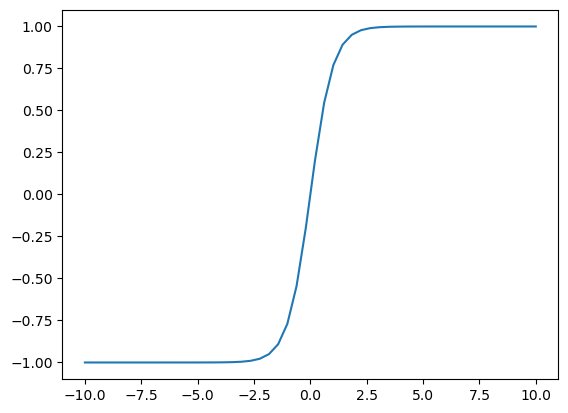

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt

m = nn.Sigmoid() #sigmoid
m = nn.ReLU() # ReLU
m = nn.GELU() # GELU
m = nn.Tanh() #tanh
x = torch.linspace(-10,10,50)
y = m(x)
plt.plot(x,y)
plt.show()

ソフトマックス関数

In [34]:
import torch
from torch import nn

m = nn.Softmax(dim = -1)
x = torch.tensor([[1.0,2.0,3.0],[3.0,2.0,1.0]])
y = m(x)

print(y)

tensor([[0.0900, 0.2447, 0.6652],
        [0.6652, 0.2447, 0.0900]])


損失関数

In [27]:
import torch
from torch import nn
#平均二乗誤差
y = torch.tensor([3.0, 3.0, 3.0]) #出力
t = torch.tensor([2.0, 2.0, 2.0]) #正解

loss_func = nn.MSELoss() # 平均二乗誤差
loss = loss_func(y,t)
print(loss.item())

1.0


In [37]:
#交差エントロピー誤差
#softmax関数への入力
x = torch.tensor([[1.0,2.0,3.0],  #入力1
                  [3.0,2.0,1.0]]) #入力2

#正解(one-hot表現における1の位置)

t = torch.tensor([2,  #入力1に対応する正解
                  0]) #入力2に対応する正解

loss_func = nn.CrossEntropyLoss() # softmax関数 + 交差エントロピー誤差
loss = loss_func(x,t)
print(loss.item())

0.40760594606399536
